In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import joblib

import os
os.environ['LOKY_MAX_CPU_COUNT'] = '8'

In [8]:
df = pd.read_csv("Clustering Data.csv")
df_sample = df.sample(frac=0.2, random_state=42)
X = df_sample.drop(columns = ['Id', 'LengthOfStayInMonths'])

In [9]:
# Try a range of cluster numbers
range_n_clusters = range(2, 11)

inertia = []  # For elbow method
sil_scores = []  # For silhouette scores

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    inertia.append(kmeans.inertia_)  # Total within-cluster sum of square
    sil_scores.append(silhouette_score(X, cluster_labels))  # Mean silhouette coefficient

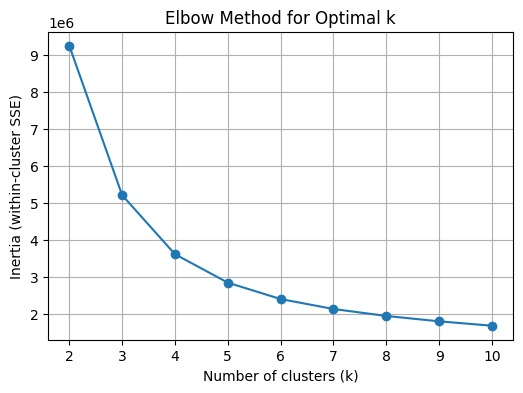

In [10]:
# Elbow Curve

plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster SSE)')
plt.grid(True)
plt.show()

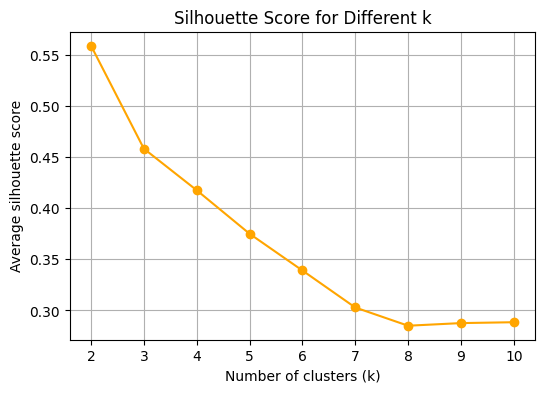

In [11]:
# Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, sil_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.grid(True)
plt.show()

Elbow point is at k = 4 or 5, since silhouette is better at k = 4, continue with 4 clusters.

In [13]:
X = df.drop(columns = ['Id', 'LengthOfStayInMonths'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

In [14]:
df.to_csv('Clustered Data.csv', index = False)
joblib.dump(kmeans, 'kmeans_k4_model.pkl')

['kmeans_k4_model.pkl']